In [1]:
# Loding required dependencies

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
# Load dataset

ipl = pd.read_csv('D:/CODES/DATASETS/matches.csv')
ipl.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
# Checking structure

ipl.shape


(636, 18)

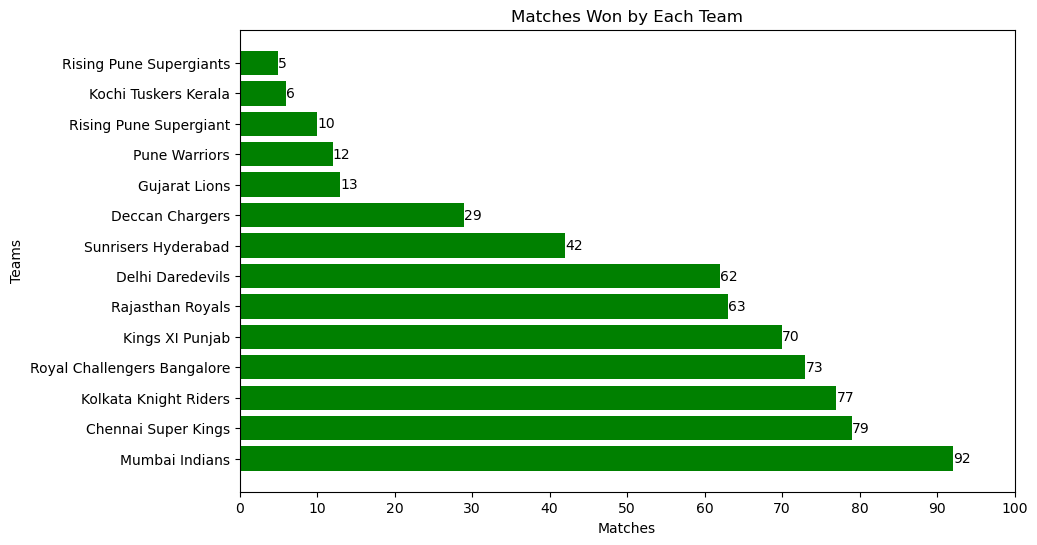

In [4]:
# Plot 1: Matches Won by Each Team

teams = list(ipl['winner'].value_counts().keys())
matches = list(ipl['winner'].value_counts())
plt.figure(figsize=(10, 6))
plt.barh(teams, matches, color='g')
plt.title('Matches Won by Each Team')
plt.xlabel('Matches')
plt.ylabel('Teams')
plt.xticks(np.arange(0, 110, step=10))
for i, v in enumerate(matches):
    plt.text(v, teams[i], str(v), va='center', fontsize=10)
plt.show()


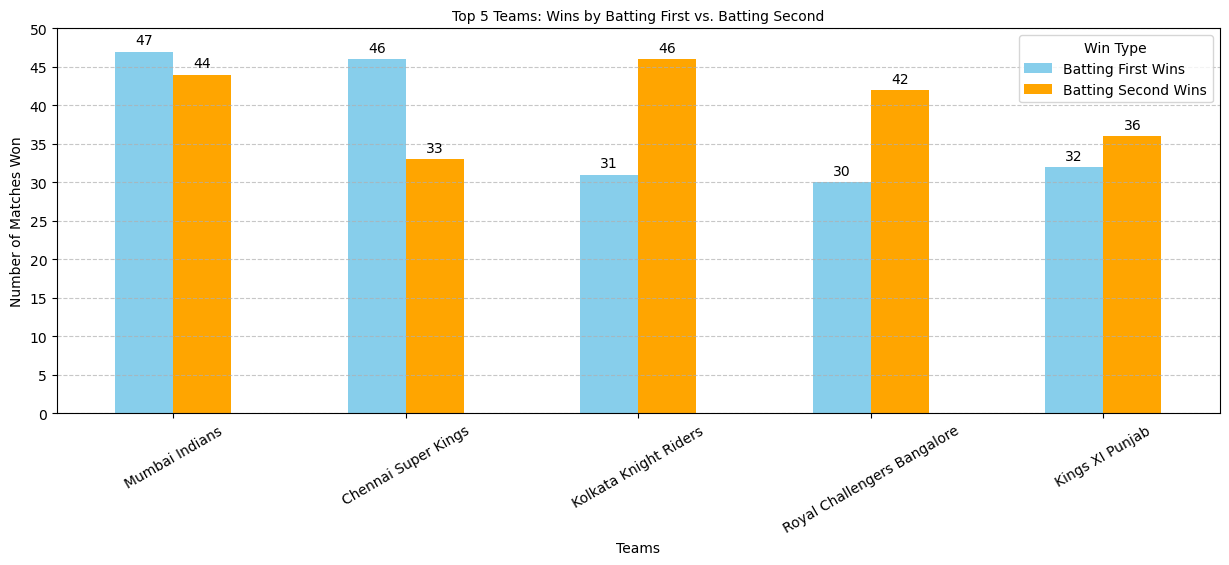

In [5]:
# Plot 2: Wins by Batting First vs Batting Second for Top 5 Teams

batting_first_wins = ipl[ipl['win_by_runs'] > 0]['winner'].value_counts()
batting_second_wins = ipl[ipl['win_by_wickets'] > 0]['winner'].value_counts()

wins_df = pd.DataFrame({'Batting First Wins': batting_first_wins,
                        'Batting Second Wins': batting_second_wins}).fillna(0)
top_teams = wins_df.sum(axis=1).nlargest(5).index
top_teams_df = wins_df.loc[top_teams]
ax = top_teams_df.plot(kind='bar', figsize=(15, 5), color=['skyblue', 'orange'])
plt.xlabel("Teams",fontsize=10)
plt.ylabel("Number of Matches Won", fontsize=10)
plt.title("Top 5 Teams: Wins by Batting First vs. Batting Second", fontsize=10)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(np.arange(0, 55, step=5),fontsize=10)
plt.legend(title="Win Type", fontsize=10,title_fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', fontsize=10, padding=3)
plt.show()


In [6]:
# Table 1: Match Result Counts

result_counts = ipl['result'].value_counts()
result = pd.DataFrame({'Result': result_counts.index, 'Count': result_counts.values})
result


,Result,Count
0,normal,626
1,tie,7
2,no result,3


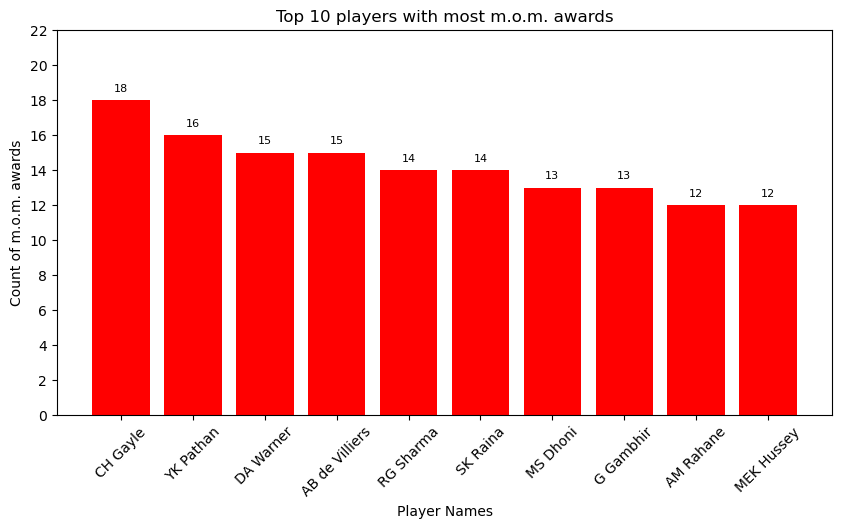

In [7]:
# Plot 3: Top 10 Players with Most Man of the Match Awards

names = list(ipl['player_of_match'].value_counts()[ : 10].keys())
mom_awards = list(ipl['player_of_match'].value_counts()[ : 10])
plt.figure(figsize=(10,5))
plt.bar(names, mom_awards, color = 'r')
plt.title('Top 10 players with most m.o.m. awards')
plt.xlabel("Player Names")
plt.ylabel("Count of m.o.m. awards")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max(mom_awards)+5,step=2))
for i, v in enumerate(mom_awards):
    plt.text(i, v + 0.5, str(v), ha = 'center', fontsize = 8) 
plt.show()


In [8]:
# Table 2: Matches Played in Each City

city_counts = ipl['city'].value_counts()
city_matches = pd.DataFrame({'City': city_counts.index, 'Number of Matches': city_counts.values})
city_matches


,City,Number of Matches
0,Mumbai,85
1,Bangalore,66
2,Kolkata,61
3,Delhi,60
4,Hyderabad,49
5,Chennai,48
6,Chandigarh,46
7,Jaipur,33
8,Pune,32
9,Durban,15


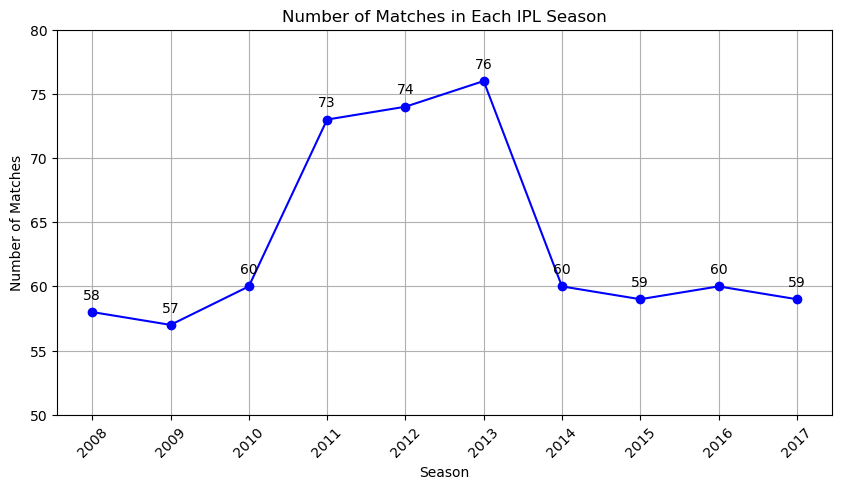

In [9]:
# Plot 4: Number of Matches in Each IPL Season

season_counts = ipl['season'].value_counts().sort_index()
season_df = pd.DataFrame({'Season': season_counts.index, 'Number of Matches': season_counts.values})
plt.figure(figsize=(10, 5))
plt.plot(season_df['Season'], season_df['Number of Matches'], marker='o', linestyle='-', color='b')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Number of Matches in Each IPL Season')
plt.yticks(np.arange(50, max(season_df['Number of Matches']) + 5, step=5))
plt.xticks(season_df['Season'], rotation=45)
plt.grid(True)
for i, txt in enumerate(season_df['Number of Matches']):
    plt.text(season_df['Season'][i], txt + 1, str(txt), ha='center', fontsize=10)
plt.show()


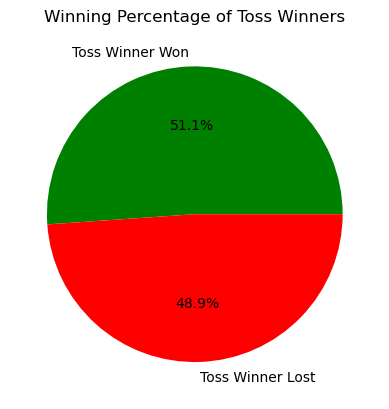

In [10]:
# Plot 5: Toss Winner Winning Percentage

toss_win_match_win = ipl[ipl['toss_winner'] == ipl['winner']].shape[0]
toss_win_match_loss = ipl.shape[0] - toss_win_match_win
plt.pie([toss_win_match_win, toss_win_match_loss], labels=["Toss Winner Won", "Toss Winner Lost"], autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Winning Percentage of Toss Winners")
plt.show()


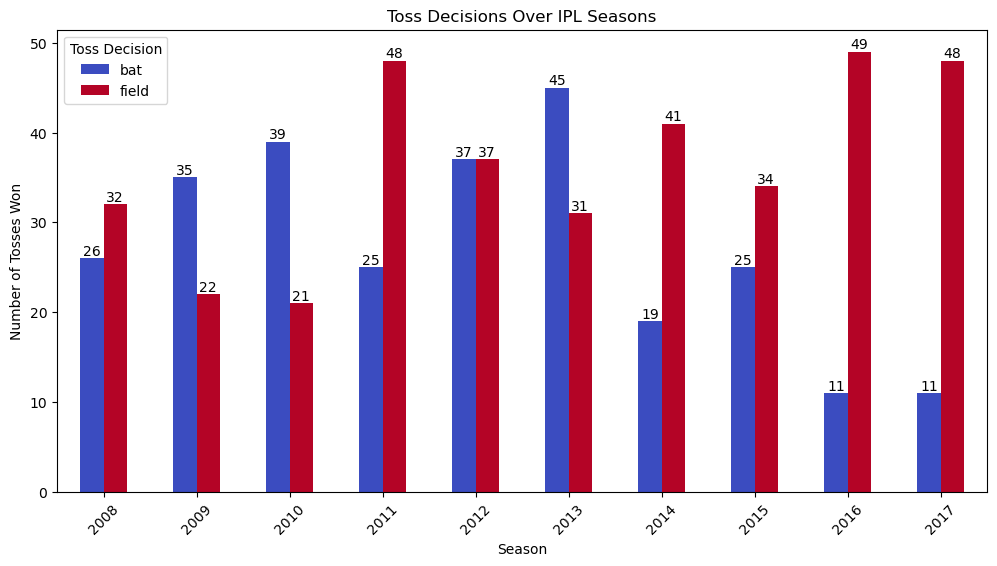

In [11]:
# Plot 6: Toss Decisions Over IPL Seasons

toss_decisions = ipl.groupby(['season', 'toss_decision']).size().unstack()
ax = toss_decisions.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.xlabel("Season")
plt.ylabel("Number of Tosses Won")
plt.title("Toss Decisions Over IPL Seasons")
plt.legend(title="Toss Decision")
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')
plt.show()
